Importing the necessary libraries 

In [4]:
import pandas as pd 
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np


Downloading the data of stock  (ex-NIFTY-50)


In [5]:
def prepare_data():

    start='2011-12-26'
    end= dt.datetime.now()
    data=yf.download('^NSEI')
    return data
    

Calculating the Kaufmann efficiency ratio

In [6]:
def eff_ratio(data,period=16):
    df=data.copy()
    df['price_change']=df['Close'].diff()
    df.dropna(inplace=True)

    df['5 day change']=df['Close'].diff(period)
    df['change_abs']=abs(df['price_change'])

    df['5 day change sum']=df['change_abs'].rolling(period).sum()
    df.dropna(inplace=True)

    df['eff_ratio']=abs(df['5 day change'])/df['5 day change sum']

    # Add a column indicating if the market is trending
    df['Trending'] = df['eff_ratio'] > 0.65
    

    return df
     

In [7]:
df=prepare_data()

[*********************100%%**********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-09-08,19774.800781,19867.150391,19727.050781,19819.949219,19819.949219,288100
2023-09-11,19890.000000,20008.150391,19865.349609,19996.349609,19996.349609,248800
2023-09-12,20110.150391,20110.349609,19914.650391,19993.199219,19993.199219,328100


In [10]:
df=eff_ratio(df)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,price_change,5 day change,change_abs,5 day change sum,eff_ratio,Trending
Date,,,,,,,,,,,,
2007-10-11,5438.899902,5532.750000,5424.250000,5524.850098,5524.850098,0,83.399902,978.649902,83.399902,1230.049316,0.795618,True
2007-10-12,5525.299805,5549.299805,5402.600098,5428.250000,5428.250000,0,-96.600098,695.899902,96.600098,1140.499512,0.610171,False
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5670.399902,0,242.149902,922.850098,242.149902,1367.449707,0.674869,True
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5668.049805,0,-2.350098,830.500000,2.350098,1279.799805,0.648930,False
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5559.299805,0,-108.750000,627.099609,108.750000,1293.899414,0.484659,False


Plotting the close price and the Kaufmann efficiency ratio of last one year

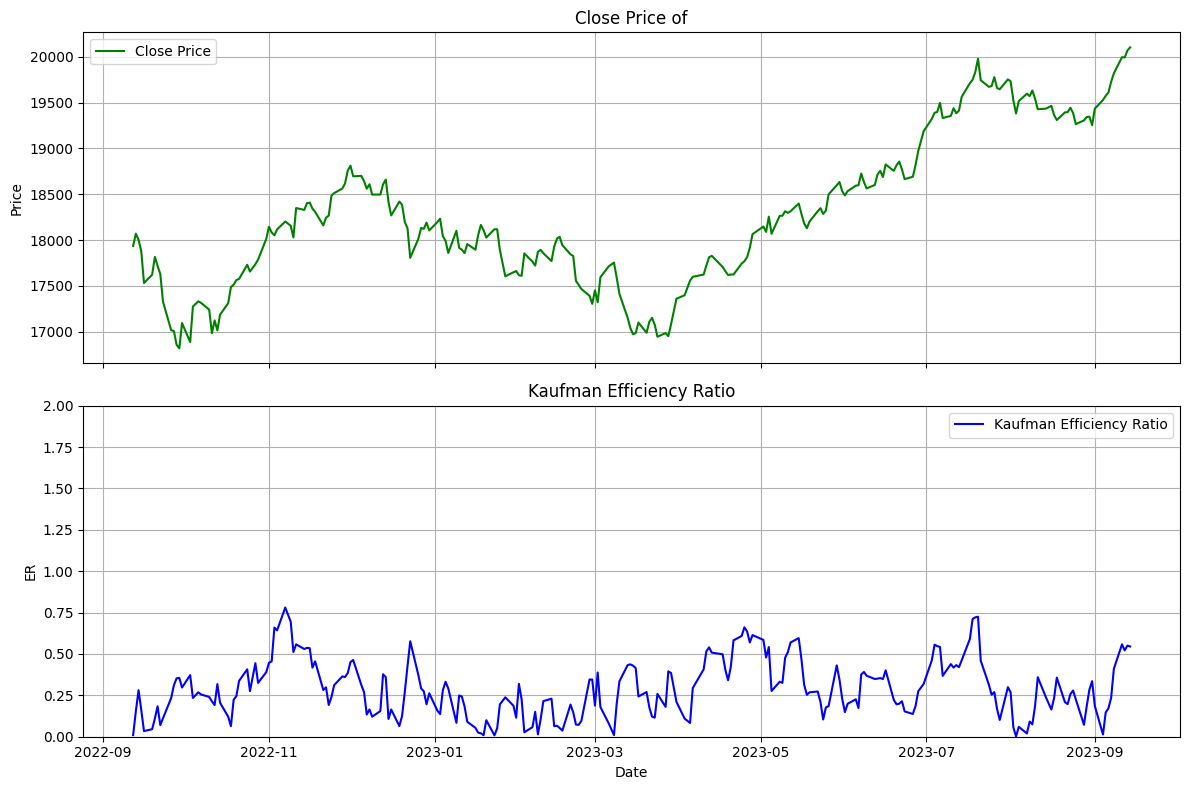

In [13]:
# Create a figure with two subplots: Close Price and Kaufman Efficiency Ratio
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Plot Close Price
ax1.plot(df.index[-252:], df['Close'][-252:], label='Close Price', color='green')
ax1.set_title('Close Price of')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot Kaufman Efficiency Ratio
ax2.plot(df.index[-252:], df['eff_ratio'][-252:], label='Kaufman Efficiency Ratio', color='blue')
ax2.set_title('Kaufman Efficiency Ratio')
ax2.set_xlabel('Date')
ax2.set_ylabel('ER')
ax2.set_ylim(0, 2)  # Set the y-axis limit to the range [0, 1]
ax2.legend()
ax2.grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



**Conclusion**

Kaufman efficiency ratio can be used with any indicator for trend confirmation